In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import datetime as dt
plt.style.use('ggplot')

In [2]:
train = pd.read_csv('bike_train.csv',parse_dates=['datetime'])
test = pd.read_csv('bike_test.csv',parse_dates=['datetime'])

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


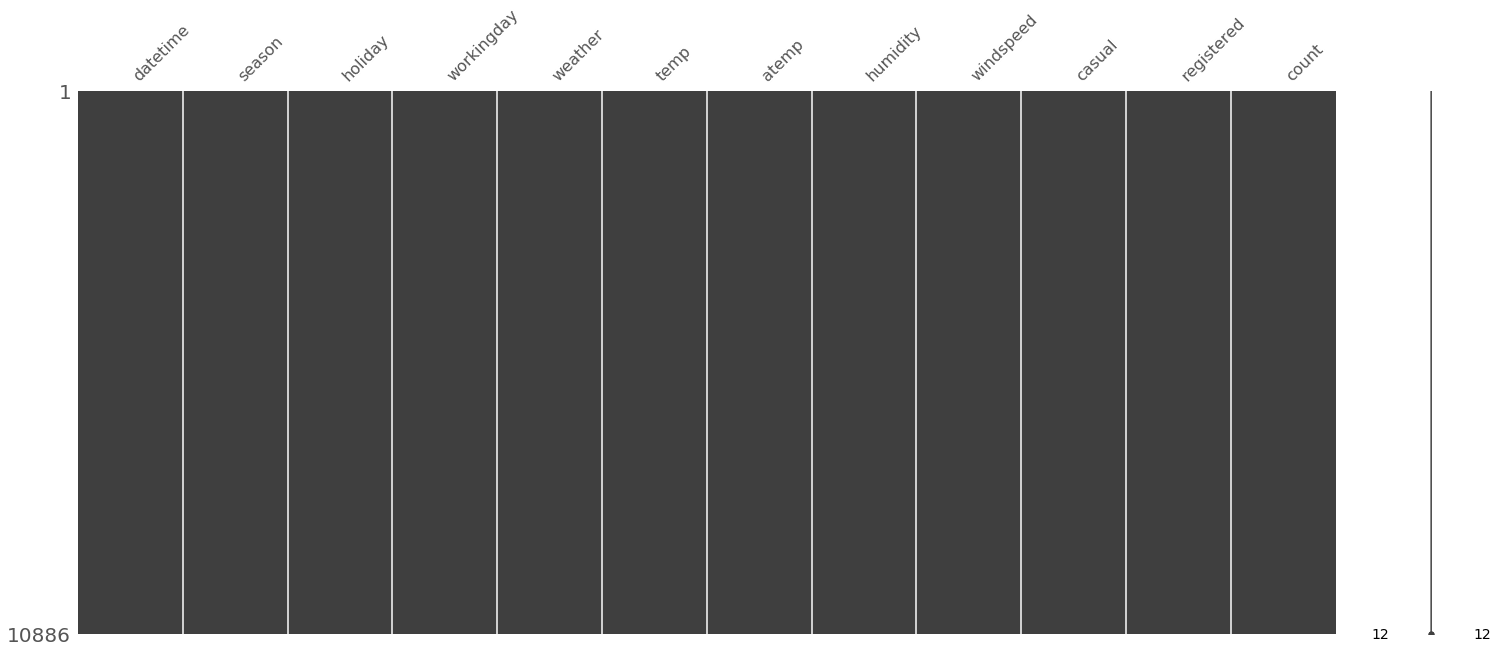

In [5]:
import missingno as msno
msno.matrix(train)

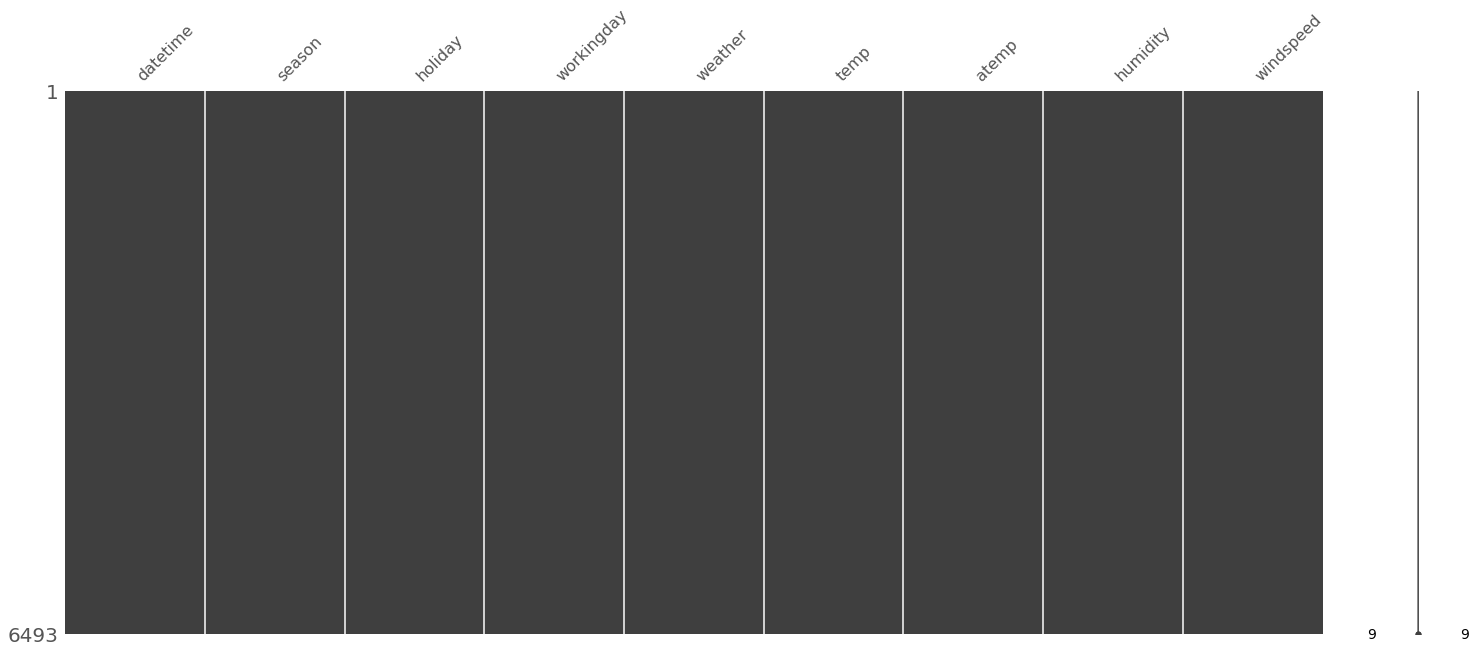

In [6]:
msno.matrix(test)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


# EDA

In [8]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['weekday'] = train['datetime'].dt.weekday
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


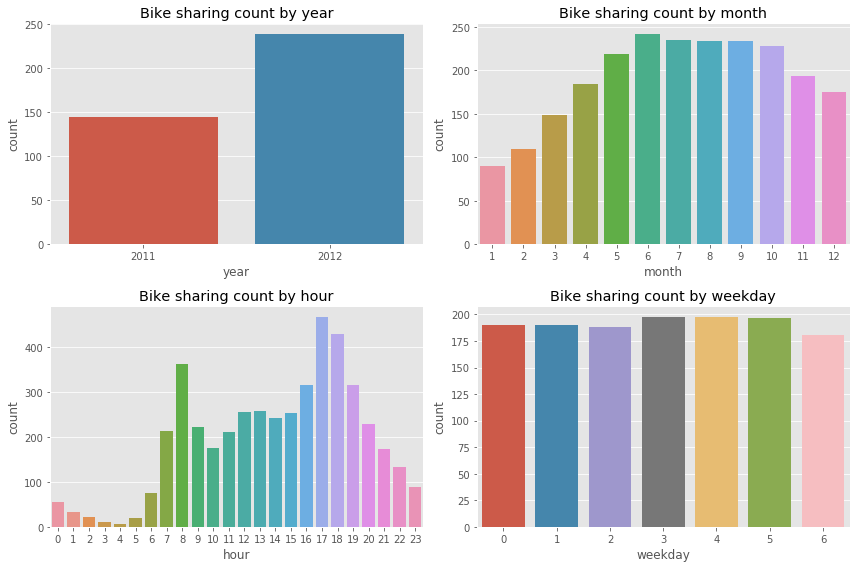

In [9]:
fig,axes = plt.subplots(2,2,figsize=(12,8))
sns.barplot(x=train['year'],y=train['count'],ax=axes[0,0],ci=False)
sns.barplot(x=train['month'],y=train['count'],ax=axes[0,1],ci=False)
#sns.barplot(x=train['day'],y=train['count'],ax=axes[1,0],ci=False)
sns.barplot(x=train['hour'],y=train['count'],ax=axes[1,0],ci=False)
sns.barplot(x=train['weekday'],y=train['count'],ax=axes[1,1],ci=False)
axes[0,0].set(title='Bike sharing count by year')
axes[0,1].set(title='Bike sharing count by month')
axes[1,0].set(title='Bike sharing count by hour')
axes[1,1].set(title='Bike sharing count by weekday')
plt.tight_layout()

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

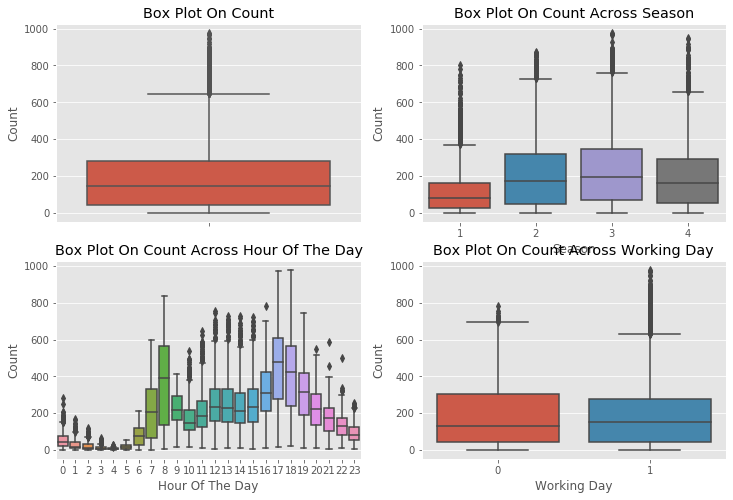

In [10]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,8))

sns.boxplot(data=train,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=train,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=train,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=train,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

Exist too many outliers.

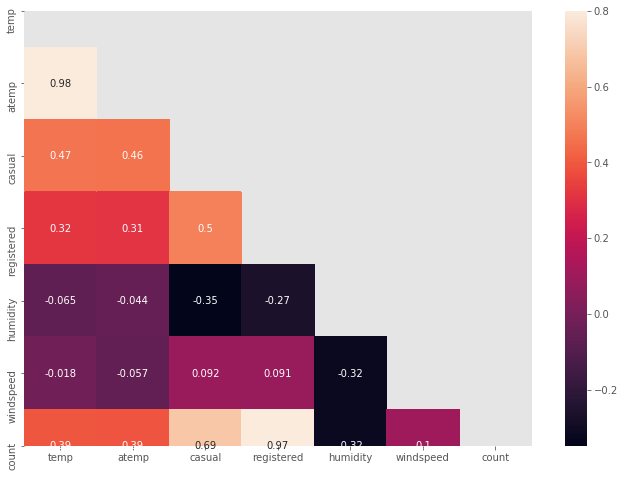

In [11]:
plt.figure(figsize=(12,8))
corr_matrix = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix,mask=mask,vmax=.8,square=True,annot=True)

- temp and atemp have strong correlation
- registered and conut have strong correlation.

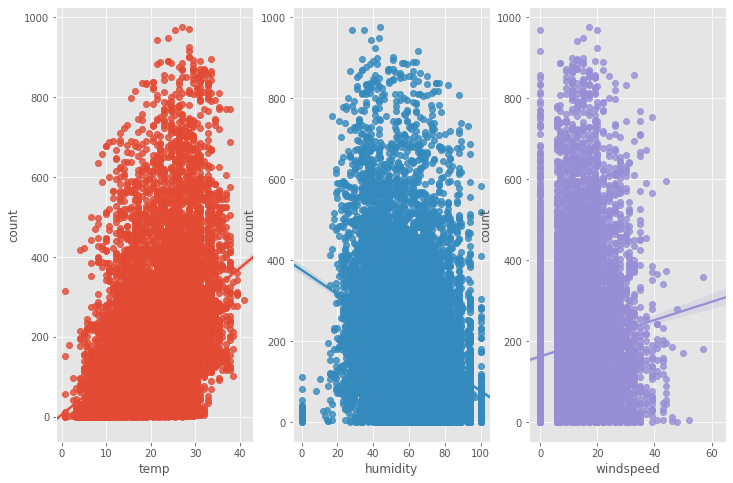

In [12]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(12,8))
sns.regplot(x=train['temp'],y=train['count'],ax=ax1)
sns.regplot(x=train['humidity'],y=train['count'],ax=ax2)
sns.regplot(x=train['windspeed'],y=train['count'],ax=ax3)

Windspeed has too many 0 values.

My guess is that the unmeasured value goes into zero.


I will adjust these values through xgboostRegressor later

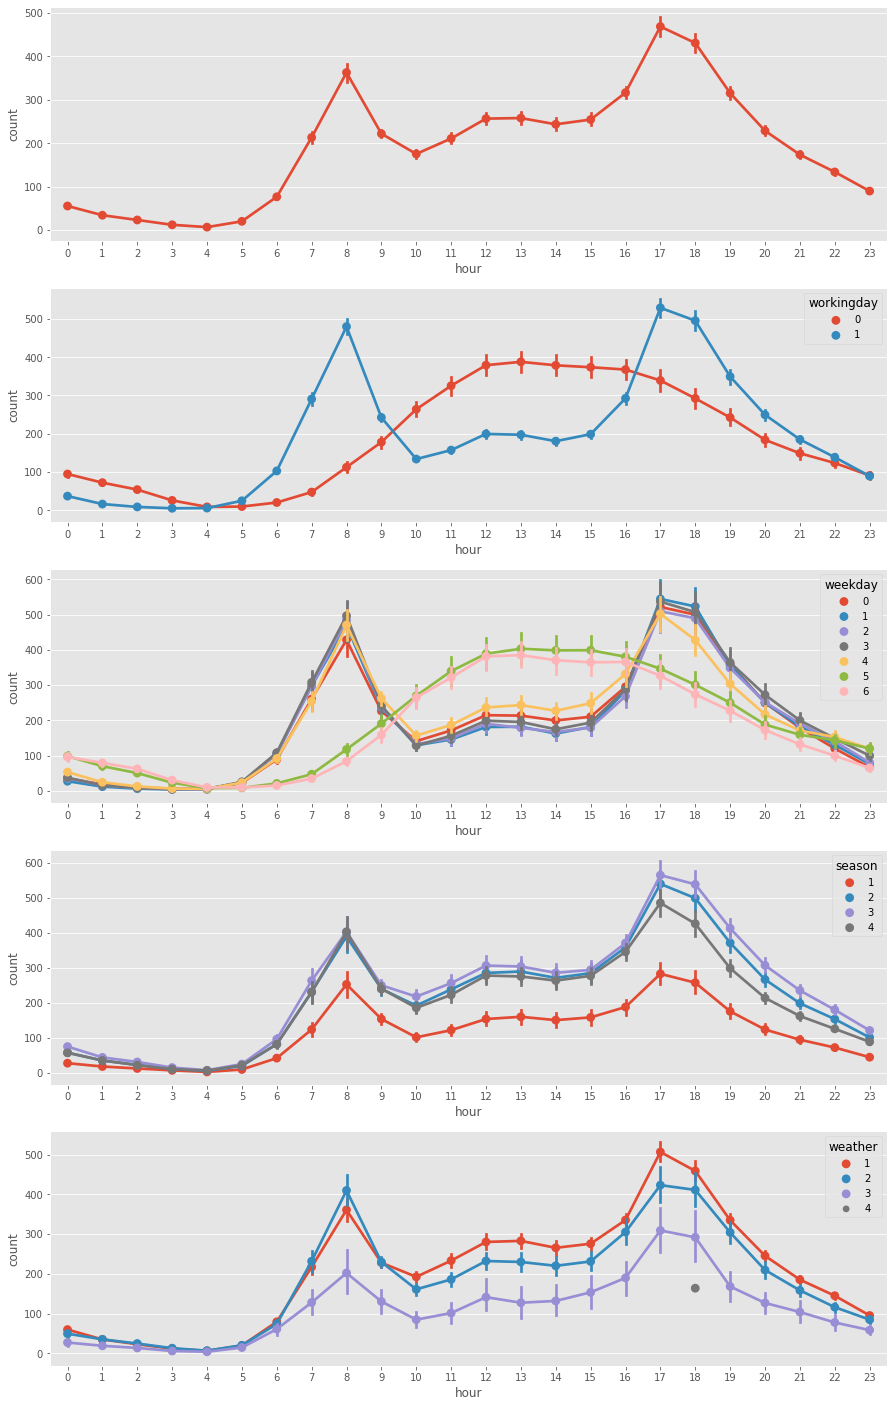

In [13]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5,figsize=(15,25))
sns.pointplot(data=train,x='hour',y='count',ax=ax1)
sns.pointplot(data=train,x='hour',y='count',hue='workingday',ax=ax2)
sns.pointplot(data=train,x='hour',y='count',hue='weekday',ax=ax3)
sns.pointplot(data=train,x='hour',y='count',hue='season',ax=ax4)
sns.pointplot(data=train,x='hour',y='count',hue='weather',ax=ax5)

- During the weekends, daytime hours are frequently used, and weekdays are commuted.
- It is also affected by the weather, and the better the weather, the more it is used.

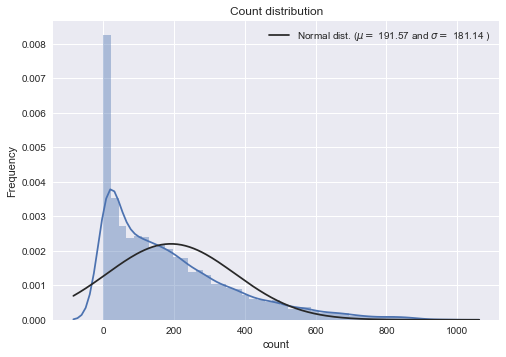

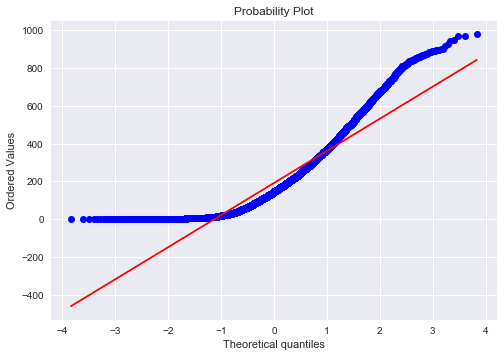

In [14]:
from scipy.stats import norm, skew
from scipy import stats
plt.style.use('seaborn')
sns.distplot(train['count'] , fit=norm)
mu, sigma = norm.fit(train['count'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Count distribution')

#Get also the QQ-plot
fig = plt.figure()
stats.probplot(train['count'],plot=plt)
plt.show()

Normalization of the dependent variable is desirable for regression, so log1p is used to normalize it.

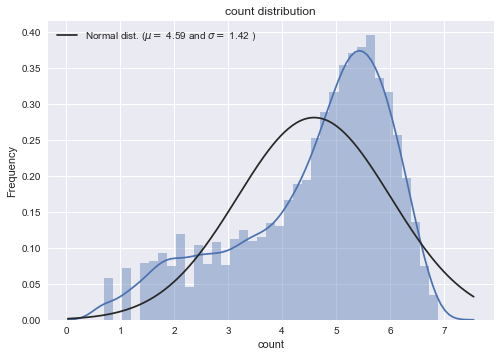

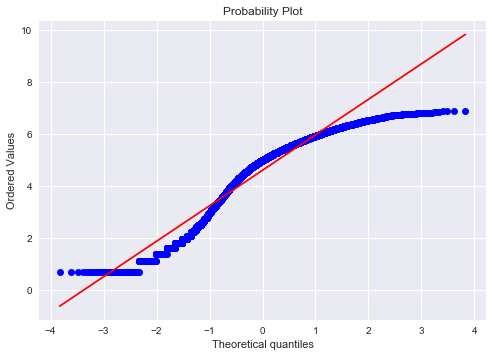

In [15]:
sns.distplot(np.log1p(train['count']),fit=norm)
mu,sigma = norm.fit(np.log1p(train['count']))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('count distribution')
fig=plt.figure()
stats.probplot(np.log1p(train['count']),fit=True,plot=plt)
plt.show()

We can see that it has been normalized even a little. Therefore, log1p should be taken later for the Count variable.

Let's adjust outliers

- windseed

In [16]:
data= train.append(test)
windColumns = ["season","weather","humidity","month","temp","year","atemp"]
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour
data['weekday'] = data['datetime'].dt.weekday
data['dayofweek'] = data['datetime'].dt.dayofweek

In [17]:
from xgboost import XGBRegressor
X = data[data['windspeed']!=0]
y = data[data['windspeed']==0]
wind_train_x = X[windColumns]
wind_train_y = X['windspeed']
wind_test_x = y[windColumns]
wind_test_y_idx = y['windspeed'].index
xgb=XGBRegressor()
xgb.fit(wind_train_x,wind_train_y)
pred = xgb.predict(wind_test_x)

[21:05:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [18]:
y['windspeed'] = pred
data = X.append(y).sort_values('datetime')

In [19]:
data[data['windspeed'] == 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday,dayofweek


Text(0.5, 1.0, 'windspeed countplot(int)')

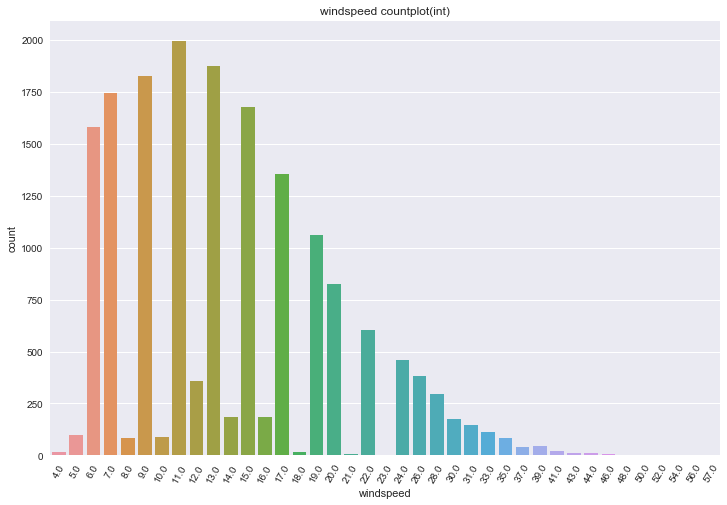

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(np.round(data['windspeed']))
plt.xticks(rotation=60)
plt.title('windspeed countplot(int)')

# Modeling

In [21]:
category_features = ["season","holiday","workingday","weather","weekday","year"]
for i in category_features:
    data[i] = data[i].astype('category')
final_train = data[data['count'].notnull()]
final_test = data[data['count'].isnull()]
train_x = final_train.drop('count',axis=1)
train_y = final_train['count']
test_x = final_test.drop('count',axis=1)
datetime = test_x.datetime

In [22]:
drop_feat = ['datetime','day','casual','registered']
train_x.drop(drop_feat,axis=1,inplace=True)
test_x.drop(drop_feat,axis=1,inplace=True)

- dummy set

In [23]:
dummy_train_x = pd.get_dummies(train_x) # 그 전에 categoroy type으로 바꿔줘야 함
dummy_test_x = pd.get_dummies(test_x)

In [24]:
from sklearn.metrics import mean_squared_log_error
def rmsle(pred_y,test_y):    
    return np.sqrt(mean_squared_log_error(test_y,pred_y))

In [25]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV,LassoCV,ElasticNetCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from lightgbm.sklearn import LGBMRegressor

In [26]:
alpha_las=[0.0005,0.0001,0.00005,0.00001]
e_ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
lasso = make_pipeline(RobustScaler(),LassoCV(alphas=alpha_las,random_state=42,max_iter=1e7))

ridge = make_pipeline(RobustScaler(),RidgeCV(alphas = alpha_las))

elastic = make_pipeline(RobustScaler(),ElasticNetCV(max_iter=1e7,alphas=alpha_las,l1_ratio = e_ratio))

rf = RandomForestRegressor(bootstrap=True,max_depth=70,max_features='auto',min_samples_leaf=4,min_samples_split=10,n_estimators=2200)

gra = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

lgbm = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

ada = AdaBoostRegressor(n_estimators=2200,random_state=42,learning_rate=0.05)

In [27]:
model = [lasso,ridge,elastic,rf,gra,xgb,lgbm,ada]
model_name = ['Lasso','Ridge','ElasticNet','RandomForest','GradientBoost','XGBoost','LGBM','Ada']
tmp = pd.DataFrame(columns=['model','rmsle'])
idx=0
for i,j in zip(model,model_name):
    train_y_log = np.log1p(train_y)
    i.fit(dummy_train_x,train_y_log)
    pred = i.predict(dummy_train_x)
    tmp.loc[idx,'model'] = j
    tmp.loc[idx,'rmsle'] = rmsle(train_y_log,pred)
    idx+=1
tmp = tmp.sort_values(by= 'rmsle')

In [28]:
tmp

,model,rmsle
3,RandomForest,0.0594726
4,GradientBoost,0.0648249
5,XGBoost,0.0685286
6,LGBM,0.0989204
7,Ada,0.14671
1,Ridge,0.229129
0,Lasso,0.229194
2,ElasticNet,0.229194


- stacking
    - rmsle score가 크게 나온 3개의 모델은 stacking에 포함하지 않을 것이다.

In [29]:
from mlxtend.regressor import StackingCVRegressor
stack = StackingCVRegressor(regressors=(gra,xgb,lgbm,ada),
                           meta_regressor=rf,use_features_in_secondary=True)

In [30]:
train_y_log = np.log1p(train_y)
stack.fit(dummy_train_x,train_y_log)
pred = stack.predict(np.array(dummy_train_x))
tmp.loc[idx,'model'] = 'Stack'
tmp.loc[idx,'rmsle'] = rmsle(train_y_log,pred)

In [31]:
tmp=tmp.sort_values('rmsle')
tmp['rmsle2'] = tmp['rmsle'].map('{:.4f}'.format)

C:\Users\winst\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


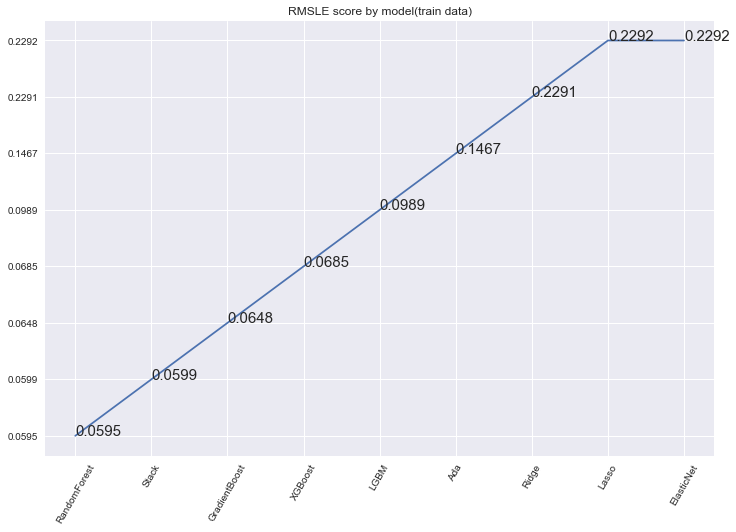

In [40]:
plt.figure(figsize=(12,8))
ax = fig.add_subplot()
plt.plot(tmp['model'],tmp['rmsle2'])
for i,j in zip(tmp['model'],tmp['rmsle2']):
#     ax.annotate(str(j),xy=(i,j))
    plt.text(i, j, str(j),fontsize=15)
plt.xticks(rotation=60)
plt.title('RMSLE score by model(train data)')
plt.show()

In [38]:
def blend_model(X):
    return (0.3*rf.predict(X))+(0.25*stack.predict(np.array(X)))+(0.2*gra.predict(X))+\
(0.1*xgb.predict(X))+(0.1*lgbm.predict(X))+(0.05*ada.predict(X))

In [39]:
pred = blend_model(dummy_train_x)
print(rmsle(train_y_log,pred))

0.06346727897610106


In [47]:
final_mix_model = (0.35*stack.predict(np.array(dummy_test_x)))+0.25*xgb.predict(dummy_test_x)+\
0.25*gra.predict(dummy_test_x)+0.1*blend_model(dummy_test_x)

In [50]:
final=pd.DataFrame(columns=['datetime','count'])
final['datetime'] = datetime
final['count'] = np.exp(final_mix_model)
# final.to_csv('mix_model.csv',index=False)